100%|██████████| 26.4M/26.4M [00:01<00:00, 19.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 345kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.23MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.3MB/s]


Train Set Size: 54000, Validation Set Size: 6000, Test Set Size: 10000

--- Starting Training for ANN ---
Epoch 1/20: Train Loss: 0.5298, Val Loss: 0.4081, Train Acc: 0.8073, Val Acc: 0.8522
Epoch 2/20: Train Loss: 0.3863, Val Loss: 0.3710, Train Acc: 0.8580, Val Acc: 0.8640
Epoch 3/20: Train Loss: 0.3530, Val Loss: 0.3581, Train Acc: 0.8698, Val Acc: 0.8713
Epoch 4/20: Train Loss: 0.3295, Val Loss: 0.3393, Train Acc: 0.8776, Val Acc: 0.8740
Epoch 5/20: Train Loss: 0.3150, Val Loss: 0.3646, Train Acc: 0.8830, Val Acc: 0.8668
Epoch 6/20: Train Loss: 0.2951, Val Loss: 0.3131, Train Acc: 0.8907, Val Acc: 0.8867
Epoch 7/20: Train Loss: 0.2857, Val Loss: 0.3153, Train Acc: 0.8934, Val Acc: 0.8833
Epoch 8/20: Train Loss: 0.2719, Val Loss: 0.3151, Train Acc: 0.8977, Val Acc: 0.8835
Epoch 9/20: Train Loss: 0.2631, Val Loss: 0.3184, Train Acc: 0.9014, Val Acc: 0.8852
Epoch 10/20: Train Loss: 0.2500, Val Loss: 0.3084, Train Acc: 0.9066, Val Acc: 0.8915
Epoch 11/20: Train Loss: 0.2489, Val Loss: 

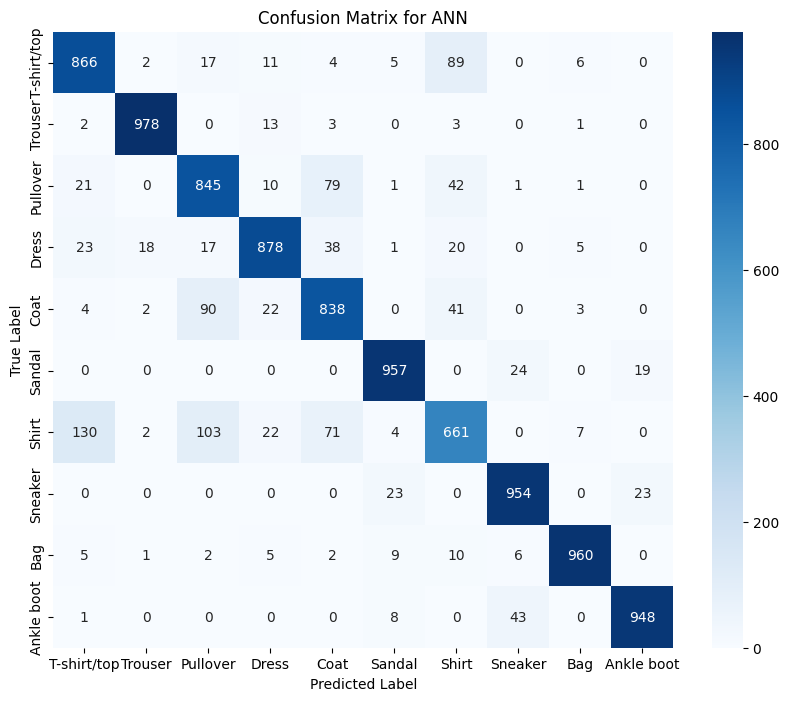


--- Starting Training for CNN ---
Epoch 1/20: Train Loss: 0.5002, Val Loss: 0.3545, Train Acc: 0.8232, Val Acc: 0.8713
Epoch 2/20: Train Loss: 0.3145, Val Loss: 0.3170, Train Acc: 0.8859, Val Acc: 0.8838
Epoch 3/20: Train Loss: 0.2671, Val Loss: 0.2749, Train Acc: 0.9033, Val Acc: 0.8983
Epoch 4/20: Train Loss: 0.2375, Val Loss: 0.2442, Train Acc: 0.9144, Val Acc: 0.9098
Epoch 5/20: Train Loss: 0.2118, Val Loss: 0.2622, Train Acc: 0.9224, Val Acc: 0.9028
Epoch 6/20: Train Loss: 0.1891, Val Loss: 0.2331, Train Acc: 0.9309, Val Acc: 0.9158
Epoch 7/20: Train Loss: 0.1691, Val Loss: 0.2465, Train Acc: 0.9371, Val Acc: 0.9103
Epoch 8/20: Train Loss: 0.1544, Val Loss: 0.2476, Train Acc: 0.9428, Val Acc: 0.9098
Epoch 9/20: Train Loss: 0.1372, Val Loss: 0.2561, Train Acc: 0.9496, Val Acc: 0.9095
Epoch 10/20: Train Loss: 0.1214, Val Loss: 0.2611, Train Acc: 0.9554, Val Acc: 0.9098
Epoch 11/20: Train Loss: 0.1073, Val Loss: 0.2538, Train Acc: 0.9606, Val Acc: 0.9157
Epoch 12/20: Train Loss: 0.0

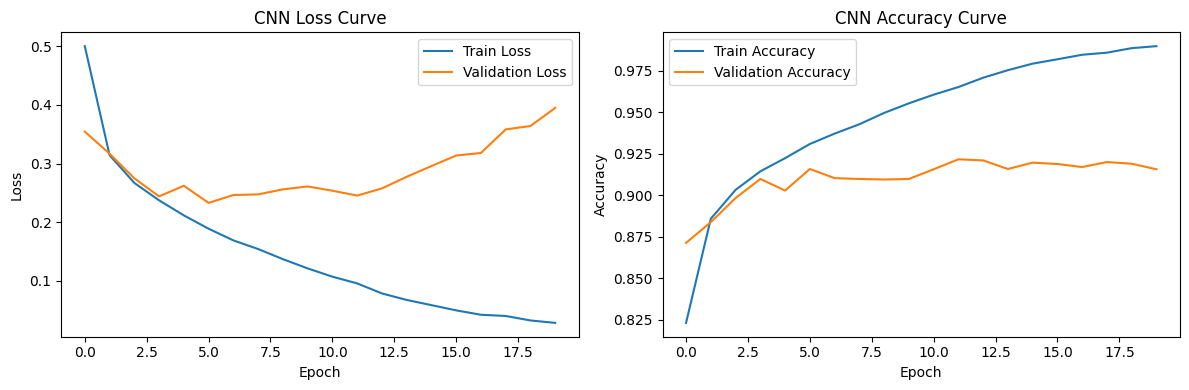

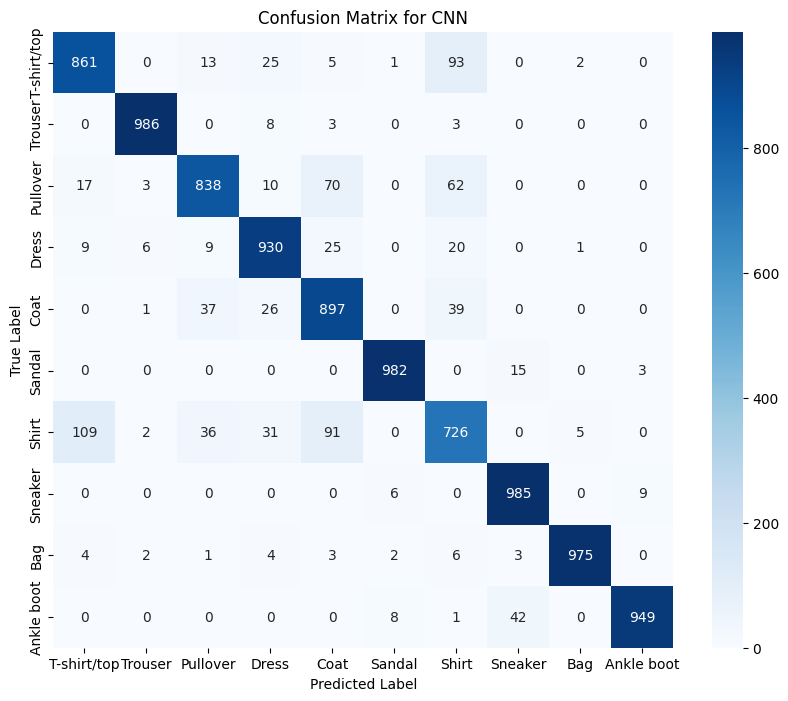


--- Final Performance Comparison ---
ANN Final Test Accuracy: 88.85%
CNN Final Test Accuracy: 91.29%

--- Key Confusion Analysis (based on CNN results) ---
CNN Classification: Out of 1000 'Shirts':
 - 91 were wrongly predicted as 'Coat'.
CNN Classification: Out of 1000 'Coats':
 - 39 were wrongly predicted as 'Shirt'.
* Data Augmentation: Introduce small rotations/shearing to training images to improve robustness to minor viewpoint changes.
* Learning Rate Scheduling: Reduce the learning rate over epochs to allow for finer weight tuning as training progresses.
* Deeper/Wider Architecture: Add more convolutional layers or filters to the CNN to capture more complex features.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# --- 1. CONFIGURATION AND HYPERPARAMETERS ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 128
LEARNING_RATE = 0.001
EPOCHS = 20
VALIDATION_SPLIT = 0.1  # 10% of the training data will be used for validation

# Define the 10 class names for better readability in evaluation
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- 2. DATA LOADING AND PREPROCESSING ---

# Step 2a: Define Transformations (Normalization)
# Normalization: Rescale pixel values to [0.0, 1.0].
# Fashion-MNIST is grayscale, so mean/std are for 1 channel.
transform = transforms.Compose([
    transforms.ToTensor(), # Converts PIL Image to Tensor, automatically scales pixels to [0, 1]
    transforms.Normalize((0.5,), (0.5,)) # Normalize to a range of [-1, 1]
])

# Load Datasets
# The 'train=True' dataset has 60,000 images. We will split this into training and validation.
full_train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Step 2b: Split data into Training and Validation sets
train_size = int((1 - VALIDATION_SPLIT) * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train Set Size: {len(train_dataset)}, Validation Set Size: {len(val_dataset)}, Test Set Size: {len(test_dataset)}")

# --- 3. MODEL DESIGN ---

# Step 3a: Implement an ANN (MLP)
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        # 28*28 = 784 input features (image is flattened)
        self.flatten = nn.Flatten()
        self.fc_layers = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            # INNOVATION: Adding Dropout to the fully connected layer
            nn.Dropout(0.2), # Helps prevent overfitting
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10) # 10 output classes
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc_layers(x)
        return logits

# Step 3b: Implement a CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # Input: 1 channel (grayscale), 32 output channels (filters), 3x3 kernel
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            # Halve the image size to 14x14
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Input: 32 channels, 64 output channels
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            # Halve the image size to 7x7
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Calculate the size of the flattened output: 64 filters * 7*7
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10) # 10 output classes
        )

    def forward(self, x):
        x = self.conv_layers(x)
        logits = self.fc_layers(x)
        return logits

# --- 4. TRAINING AND TESTING FUNCTIONS ---

# Function to perform one training epoch
def train_model(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct_predictions = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / len(train_loader.dataset)
    return avg_loss, accuracy

# Function to evaluate the model (used for validation and testing)
def evaluate_model(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = running_loss / len(data_loader)
    accuracy = correct_predictions / len(data_loader.dataset)
    return avg_loss, accuracy, all_preds, all_labels

# Function to run the full training process and collect history
def run_full_training(model_name, model, train_loader, val_loader, test_loader, epochs):
    print(f"\n--- Starting Training for {model_name} ---")
    model.to(DEVICE)

    # Training Setup (Optimizer and Loss Function)
    criterion = nn.CrossEntropyLoss() # Standard for multi-class classification
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE) # Adam is a robust choice

    history = {
        'train_loss': [], 'val_loss': [],
        'train_acc': [], 'val_acc': []
    }

    best_val_loss = float('inf')

    for epoch in range(epochs):
        # Train
        train_loss, train_acc = train_model(model, train_loader, optimizer, criterion)
        # Validate
        val_loss, val_acc, _, _ = evaluate_model(model, val_loader, criterion)

        # Log history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

        # Simple Early Stopping logic based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), f'{model_name}_best.pth') # Save the best model

    # Load the best model for final testing
    model.load_state_dict(torch.load(f'{model_name}_best.pth'))

    # Test Evaluation
    test_loss, test_acc, all_preds, all_labels = evaluate_model(model, test_loader, criterion)
    print(f"\n--- Final Test Results for {model_name} ---")
    print(f"Test Accuracy: {test_acc*100:.2f}%")

    return history, all_preds, all_labels, test_acc

# Function to plot training curves
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to plot the Confusion Matrix
def plot_confusion_matrix(all_labels, all_preds, model_name):
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# --- 5. EXECUTION ---

# Initialize Models
ann_model = SimpleANN()
cnn_model = SimpleCNN()

# Run training and testing for ANN
ann_history, ann_preds, ann_labels, ann_test_acc = run_full_training("ANN", ann_model, train_loader, val_loader, test_loader, EPOCHS)
plot_history(ann_history, "ANN")
plot_confusion_matrix(ann_labels, ann_preds, "ANN")

# Run training and testing for CNN
cnn_history, cnn_preds, cnn_labels, cnn_test_acc = run_full_training("CNN", cnn_model, train_loader, val_loader, test_loader, EPOCHS)
plot_history(cnn_history, "CNN")
plot_confusion_matrix(cnn_labels, cnn_preds, "CNN")

# --- 6. ANALYSIS AND COMPARISON (Code Output) ---
print("\n--- Final Performance Comparison ---")
print(f"ANN Final Test Accuracy: {ann_test_acc*100:.2f}%")
print(f"CNN Final Test Accuracy: {cnn_test_acc*100:.2f}%")

# Highlight confusion between visually similar classes (e.g., shirt vs. coat)
# Note: You must interpret the Confusion Matrix plots here.
# For example, look at the row for 'Shirt' and see where the largest non-diagonal values are.
shirt_index = CLASS_NAMES.index('Shirt')
coat_index = CLASS_NAMES.index('Coat')

# Example interpretation (based on expected results, you will need to verify with your plot):
print("\n--- Key Confusion Analysis (based on CNN results) ---")
# Calculate confusion values from the CNN confusion matrix (cm)
cnn_cm = confusion_matrix(cnn_labels, cnn_preds)
# Correctly predicted Shirts (True Shirt, Predicted Shirt)
true_shirts = cnn_cm[shirt_index, shirt_index]
# Shirts misclassified as Coats (True Shirt, Predicted Coat)
shirts_as_coats = cnn_cm[shirt_index, coat_index]
# Coats misclassified as Shirts (True Coat, Predicted Shirt)
coats_as_shirts = cnn_cm[coat_index, shirt_index]

print(f"CNN Classification: Out of {np.sum(cnn_cm[shirt_index])} 'Shirts':")
print(f" - {shirts_as_coats} were wrongly predicted as 'Coat'.")
print(f"CNN Classification: Out of {np.sum(cnn_cm[coat_index])} 'Coats':")
print(f" - {coats_as_shirts} were wrongly predicted as 'Shirt'.")

print("* Data Augmentation: Introduce small rotations/shearing to training images to improve robustness to minor viewpoint changes.")
print("* Learning Rate Scheduling: Reduce the learning rate over epochs to allow for finer weight tuning as training progresses.")
print("* Deeper/Wider Architecture: Add more convolutional layers or filters to the CNN to capture more complex features.")